In [1]:
from os import listdir
import numpy as np

import matplotlib.pyplot as plt 
from matplotlib.image import imread

from sklearn.model_selection import train_test_split

from keras.utils import to_categorical
from keras.applications.vgg16 import VGG16
from keras.preprocessing.image import load_img, img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras import Model

# 1. Import et utilisation du VGG-16

In [2]:
model = VGG16()

2023-09-06 15:47:20.753869: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-09-06 15:47:21.023794: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.
2023-09-06 15:47:21.129020: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 411041792 exceeds 10% of free system memory.


2023-09-06 15:47:21.295316: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.
2023-09-06 15:47:21.333987: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 67108864 exceeds 10% of free system memory.


553467096/553467096 [==============================] - 23s 0us/step


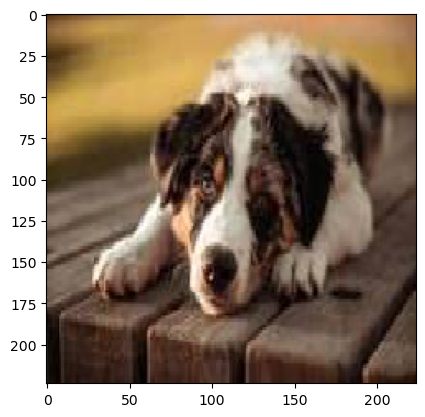

In [8]:
img = load_img("/home/jokos29/Téléchargements/chien.png", target_size= (224, 224)) # chargement et conversion taille de l'image
plt.imshow(img)
img = img_to_array(img) # converti en array numpy
img = img.reshape((1, img.shape[0], img.shape[1], img.shape[2])) # creation d'une collection d'images
img = preprocess_input(img)

In [9]:
prediction = model.predict(img) # prediction de la classe de  l'image (parmi 1000 classes d'ImageNet)

1/1 [==============================] - 1s 558ms/step


In [13]:
print(f"Top 3 : {decode_predictions(prediction, top = 3)[0]}")

Top 3 : [('n02109525', 'Saint_Bernard', 0.8702857), ('n02090622', 'borzoi', 0.029807014), ('n02109047', 'Great_Dane', 0.020829318)]


#  2. Transfer learning

In [23]:
model = VGG16(weights = "imagenet", include_top= False, input_shape= (224,224,3)) # recupere le reseau pre-entraine sans le classifieur

x = model.output # on recupere la sortie du reseau
output = Sequential()

x = Flatten()(model.output)
classfieur = Dense(1, activation = "sigmoid")(x) # nb neurones a fixer en fonction du nb de classes a predire
new_model = Model(inputs = model.input, outputs = classfieur)

new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## 2.1 Fine-tuning total
On doit rendre toutes les couches entrainables (classifieur ET convolution)

In [24]:
for layer in new_model.layers:
    layer.trainable = True
new_model.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_6 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## 2.2 Features extraction 
On entraine uniquement le classifieur et pas les couches de convolution

In [20]:
for layer in new_model.layers[:-1]:
    layer.trainable = False
new_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

## 2.3 Fine-tuning partiel

In [22]:
for layer in new_model.layers[:10]:
    layer.trainable = False
new_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_5 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

# 3. Entrainement et predictions

## 3.1 Preparations des images

## 3.2 Entrainement du modele